# Importing Packages

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [36]:
data = pd.read_csv('50_Startups.csv')
x1 = data['Administration'].values
x2 = data['Marketing Spend'].values
y = data['Profit'].values
#either way it works
#x1 = data.iloc[:,1].values
#x2 = data.iloc[:,2].values
#y = data.iloc[:,-1].values

# User Defined Functions

In [37]:
def findmean(x1):
    print(sum(x1))
    print(len(x1))
    mean = sum(x1)/len(x1)
    return mean

In [38]:
def find_slope_intercepts(x1,x2,y,x1_mean,x2_mean,y_mean):
    ssx1 = sum(x1*x1) - ((sum(x1)*sum(x1))/len(x1))
    ssx2=sum(x2*x2)-((sum(x2)*sum(x2))/len(x2))
    sumx1y=sum(x1*y)-((sum(x1)*sum(y))/len(x1))
    sumx2y=sum(x2*y)-((sum(x2)*sum(y))/len(x2))
    sumx1x2=sum(x1*x2)-((sum(x1)*sum(x2))/len(x2))
    b1=(((ssx2)*(sumx1y)-(sumx1x2)*(sumx1y))/((ssx1)*(ssx2)-((sumx1x2)**2)))
    b2=(((ssx1)*(sumx2y)-(sumx1x2)*(sumx1y))/((ssx2)*(ssx1)-((sumx1x2)**2)))
    b0= y_mean-b1*x1_mean-b2*x2_mean
    return b0,b1,b2
    

In [39]:
x1

array([136897.8 , 151377.59, 101145.55, 118671.85,  91391.77,  99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11,  91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3 , 153773.43, 122782.75, 105751.03,
        99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92,  85047.44,
       127056.21,  51283.14,  65947.93,  82982.09, 118546.05,  84710.77,
        96189.63, 127382.3 , 154806.14, 124153.04, 115816.21, 135426.92,
        51743.15, 116983.8 ])

In [40]:
x2

array([471784.1 , 443898.53, 407934.54, 383199.62, 366168.42, 362861.36,
       127716.82, 323876.68, 311613.29, 304981.62, 229160.95, 249744.55,
       249839.44, 252664.93, 256512.92, 261776.23, 264346.06, 282574.31,
       294919.57,      0.  , 298664.47, 299737.29, 303319.26, 304768.73,
       140574.81, 137962.62, 134050.07, 353183.81, 118148.2 , 107138.38,
        91131.24,  88218.23,  46085.25, 214634.81, 210797.67, 205517.64,
       201126.82, 197029.42, 185265.1 , 174999.3 , 172795.67, 164470.71,
       148001.11,  35534.17,  28334.72,   1903.93, 297114.46,      0.  ,
            0.  ,  45173.06])

In [10]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [41]:
x1_mean=findmean(x1)
x2_mean=findmean(x2)
y_mean=findmean(y)

6067231.979999998
50
10551254.890000002
50
5600631.960000001
50


In [42]:
b0,b1,b2=find_slope_intercepts(x1,x2,y,x1_mean,x2_mean,y_mean)
print("b0: ",b0)
print("b1: ",b1)
print("b2: ",b2)

b0:  24167.563316090476
b1:  0.29117738272325405
b2:  0.24884367719831013


In [45]:
print("Multiple Linear Regression Model: ")
print("y_pred=",b0,"+",b1,"x1","+",b2,"x2")

Multiple Linear Regression Model: 
y_pred= 24167.563316090476 + 0.29117738272325405 x1 + 0.24884367719831013 x2


# Gradient Descent 

In [50]:
import numpy as np

class GradientDescentMLR:
    def __init__(self, learning_rate=0.01, iters=10) -> None:
        self.learning_rate = learning_rate
        self.iters = iters

    def fit(self, X1, X2, Y):
        ones = np.ones(len(X1))
        features = np.c_[ones, X1, X2]
        known_labels = np.array(Y).reshape((len(Y),1))
        weights = np.zeros(features.shape[1])
        temp = weights
        for i in range(self.iters):
            temp[0] = weights[0] - (self.learning_rate/len(X1)) * np.sum((features @ weights) - known_labels.transpose())
            for j in range(1, len(weights)):
                temp[j] = weights[j] - (self.learning_rate/len(X1)) * ((features @ weights) - known_labels.transpose()) @ features.transpose()[j]
            for k in range(len(weights)):
                weights[k] = temp[k]
                print(f"For iteration {i+1}: \nb_{k} = {weights[k]}\n")

object = GradientDescentMLR()
X1 = np.array([2.75, 2.5, 2.25, 2, 2, 2, 1.75, 1.75])
X2 = np.array([5.3, 5.3, 5.5, 5.7, 5.9, 6, 5.9, 6.1])
y = np.array([1464, 1394, 1159, 1130, 1075, 1047, 965, 719])
object.fit(X1,X2,y)

Iteration 1: Cost 2612.125, Weight         0.9125, Bias 0.08875
Iteration 2: Cost 1840.6763140624998, Weight         1.67493125, Bias 0.163635
Iteration 3: Cost 1302.005232581096, Weight         2.31196293125, Bias 0.22693376124999998
Iteration 4: Cost 925.871456044458, Weight         2.8442089670375, Bias 0.28055044975875
Iteration 5: Cost 663.2295941170923, Weight         3.288894648664006, Bias 0.32607621435366996
Iteration 6: Cost 479.83363233031446, Weight         3.660413677716468, Bias 0.3648406421950025
Iteration 7: Cost 351.7712417354, Weight         3.9707936386157585, Bias 0.3979547557448655
Iteration 8: Cost 262.3456041853296, Weight         4.230084954185217, Bias 0.4263469416541394
Iteration 9: Cost 199.89814234552153, Weight         4.446685902528214, Bias 0.45079297345805286
Iteration 10: Cost 156.28823778710944, Weight         4.627614205814245, Bias 0.4719410989732135
Iteration 11: Cost 125.83169195535433, Weight         4.778733973781925, Bias 0.49033300368805344
Ite

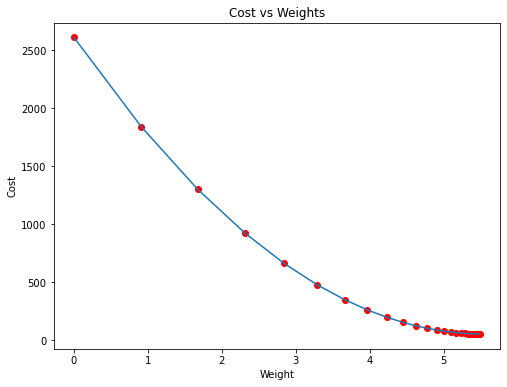

Estimated Weight: 5.498993129272515
Estimated Bias: 0.627417011189203


In [51]:
# Data
X = np.array([2,3,5,13,8,16,11,2])
Y = np.array([15,28,42,64,50,90,58,8])
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
